[Back to course overview](../CourseOverviewR.ipynb)

# Control Structures in R
* Author: Johannes Maucher
* Last Update: 2017-03-13


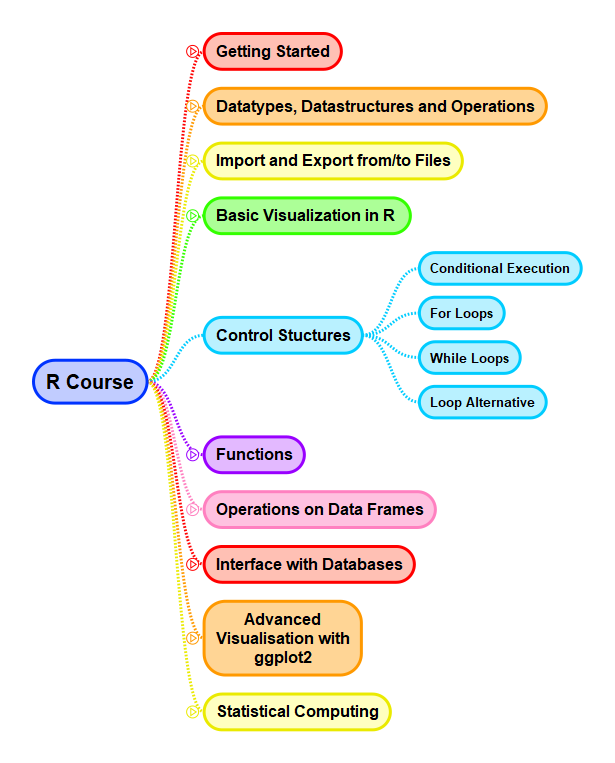

In [1]:
library("IRdisplay")
display_png(file="../../../Pics/DSRcontrol.PNG",width=900) 

In a R-program statements are executed sequentially from top to bottom. As in all other languages R provides *control structures*, which allow e.g. that statements are executed repetitively or only if certain conditions are met.
Compound statements in control structures contain more than one atomic R-statements. Such blocks of statements must be surrounded by curly brackets *{}*.

## Conditional Execution

### If-Else
In an *If-Else* control structure the (compound) statement in the *if-block* is executed only if the *condition* at the *if*-keyword is true, otherwise the (compound) statement of the *else-block* is executed:

`if (cond) statement1 else statement`

It is also possible that only an *if-block* is defined, then nothing is executed, if the condition at the if-block is not met:

`if (cond) statement`


`cond` is an expression, which resolves to either TRUE or FALSE.

Examples:

In [1]:
gender<-"Male"
if (gender=="Male"){
    print("blue")
} 

[1] "blue"


In [2]:
gender<-"Female"
if (gender=="Male"){
    mycolor<-"blue"
} else {
    mycolor<-"pink"
}
print(mycolor)

[1] "pink"


In the case of simple statements, the if-else control structure can be formulated in the following compact form:

`ifelse(cond, statement1,statement2)`

Example:

In [3]:
gender="Male"
ifelse(gender=="Male",mycolor<-"blue",mycolor<-"pink")

[1] "blue"

### Switch
An *If-Else* control structure realizes a binary decision. If more than two alternatives must be checked, the *Switch* control structure can be applied. The general syntax is:

`switch(expression, value-assignment-pairs)`

I.e. if expression evaluates to value, then the assignment, which belongs to this value is returned by the switch-function.


In [5]:
country<-"UK"
currency<-switch(country,
      "Germany" = "Euro",
      "UK" = "Pound",
      "US" = "Dollar",
      "Russia" = "Rubel"           
      )
print(currency)

[1] "Pound"


## Repeated Execution and Loop 

### For-Loop
In a *For-Loop* a (compound) statement is executed repetitively until the value of a counter-variable is no longer contained in a sequence. Usually, in each iteration of the loop the value of the variable is modified.

`for (variable in sequence) statement`

Example:


In [6]:
for (c in 1:5) print(c("Iteration ",c))

[1] "Iteration " "1"         
[1] "Iteration " "2"         
[1] "Iteration " "3"         
[1] "Iteration " "4"         
[1] "Iteration " "5"         


### Nested Loop

Nested loops are loops, which contain other loops in their statement. 

In [7]:
for (row in 1:3){
    for (col in 1:2){
        print(c(row,col))
    }
}

[1] 1 1
[1] 1 2
[1] 2 1
[1] 2 2
[1] 3 1
[1] 3 2


### While Loop
In a *While-Loop* a (compound) statement is executed repetitively until a condition is no longer true:

`while (cond) statement`

Example:

In [10]:
i<-0
result<-0
while (result<100) {
    result<-i**2
    print(result)
i=i+1
}
cat('After termination: i = ',i)

[1] 0
[1] 1
[1] 4
[1] 9
[1] 16
[1] 25
[1] 36
[1] 49
[1] 64
[1] 81
[1] 100
After termination: i =  11

> **Note:** In the case of processing the rows or columns of large datasets looping can be very inefficient and time-consuming. It is recommended, that whenever possible, R’s built-in numerical and character functions in conjunction with the *apply* family of functions shall be used (see later notebook).

### Terminate loops and iterations by *break* and *next*
The *break*-statement within a loop causes the entire loop to terminate. The *next*-statement terminates just the current iteration of the loop and then continues with the next iteration.

In [11]:
for (i in 1:5){
    if (i==4) break else print(i)
}

[1] 1
[1] 2
[1] 3


In [12]:
for (i in 1:5){
    if (i==4) next else print(i)
}

[1] 1
[1] 2
[1] 3
[1] 5


### What should not be done in loops
In the following loop in each iteration a new element is attached to a vector. This is inefficient because in each loop new memory must be allocated for storing the increasing vector.

In [13]:
system.time({
    a<-numeric()
    for(j in 1:100000){a<-c(a,j%%3)}
})

   user  system elapsed 
  26.28    0.13   26.42 

The same functionality as in the loop above can be implemented in a much faster way by first allocating the required memory for the vector and assigning in each iteration the corresponding value to the already assigned memory element.

In [14]:
system.time({
    a<-numeric(100000)
    for(j in 1:100000){a[j]<-j%%3}
})

   user  system elapsed 
   0.14    0.00    0.14 

### Alternatives for repeated Execution
Compared to other programming languages in R for- and while- loops are rarely used. This is because R provides much more efficient ways to carry out repeated execution: The functions *apply()*, *lapply()*, *sapply()* and *vapply()*. These functions are described in an upcoming lecture.

## Exercises
[Exercise on control structures in R](../../Assignments/Ass04ControlStructuresR.ipynb)